<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Supervised_Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning: Regression

## Sections required in your report:

1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.

2. Brief description of the data set you chose and a summary of its attributes.

3. Brief summary of data exploration and actions taken for data cleaning and feature engineering.

4. Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

5. A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

6. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

## The grading will center around 5 main points:

1.    Does the report include a section describing the data?

2.    Does the report include a paragraph detailing the main objective(s) of this analysis? 

3.    Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.

4.    Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?

5.    Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 

# General Section

In [1]:
# install and reset runtime
!pip install --upgrade pandas --quiet
!pip install --upgrade scikit-learn --quiet
!pip install pyproj --quiet

     |████████████████████████████████| 11.3 MB 28 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.6 MB 14.6 MB/s 


## Import needed libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
# from collections import OrderedDict
from matplotlib.gridspec import GridSpec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
pd.__version__

'1.3.2'

In [3]:
import os
import urllib.request
from zipfile import ZipFile
from pathlib import Path
from import_dataset import (load_data, basic_preprocessing,
                            add_dayof_week, add_timeof_day,
                            add_crow_direction, add_avespeed)

## Download Data

In [4]:
DATA_URL = "https://www.mathworks.com/supportfiles/practicaldsmatlab/taxi/Taxi%20Data.zip"
DATA_NAME = "TaxiData.zip"
urllib.request.urlretrieve(DATA_URL, DATA_NAME)

('TaxiData.zip', <http.client.HTTPMessage at 0x7fe1b301c9d0>)

In [5]:
# Create a ZipFile Object and load data in it
with ZipFile(DATA_NAME, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [6]:
DATA_DIR = Path.cwd() / 'Taxi Data'
DATA_DIR

PosixPath('/content/Taxi Data')

## Import and Explore Data

In [7]:
col_names = ["Vendor", "PickupTime", "DropoffTime", "Passengers", "Distance", "PickupLon", "PickupLat",
             "RateCode", "HeldFlag", "DropoffLon", "DropoffLat", "PayType", "Fare", "ExtraCharge", "Tax",
             "Tip", "Tolls", "ImpSurcharge", "TotalCharge"];

In [8]:
use_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

In [9]:
dtype = {'RateCodeID': str, 'payment_type': str, 'VendorID': str, 'RatecodeID': str,}  # , dtype=dtype

In [10]:
df = load_data(path_dir=DATA_DIR, parse_dates=parse_dates, 
                     usecols=use_cols, dtype=dtype,
                      file_substr='yellow', skiprows=1, preprocess=True)

Loading all yellow*.csv in /content/Taxi Data folder...

Converting categorical features to their corresponding values...

Removing invalid charges...

Removing invalid trip information...

Keep trips with pickup and drop off locations inside the region of interest

Adding new features: Duration...

Only keep trips with typical values..



In [11]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823895 entries, 0 to 2823894
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               2823895 non-null  object        
 1   tpep_pickup_datetime   2823895 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  2823895 non-null  datetime64[ns]
 3   passenger_count        2823895 non-null  int64         
 4   trip_distance          2823895 non-null  float64       
 5   pickup_longitude       2823895 non-null  float64       
 6   pickup_latitude        2823895 non-null  float64       
 7   RateCodeID             2823895 non-null  object        
 8   store_and_fwd_flag     2823895 non-null  object        
 9   dropoff_longitude      2823895 non-null  float64       
 10  dropoff_latitude       2823895 non-null  float64       
 11  payment_type           2823895 non-null  object        
 12  fare_amount            28238

In [12]:
df.shape

(2823895, 20)

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,VeriFone Inc.,2015-10-01 00:00:02,2015-10-01 00:17:37,2,5.68,-73.997597,40.756248,Standard rate,N,-73.941002,40.815140,Cash,18.5,0.5,0.5,0.00,0.0,0.3,19.80,17.583333
1,VeriFone Inc.,2015-10-01 00:00:23,2015-10-01 00:13:12,5,7.13,-74.016586,40.709816,Standard rate,N,-73.959991,40.766918,Cash,20.5,0.5,0.5,0.00,0.0,0.3,21.80,12.816667
2,VeriFone Inc.,2015-10-01 00:00:35,2015-10-01 00:12:17,2,1.72,-74.008247,40.714821,Standard rate,N,-73.984581,40.720299,Cash,9.5,0.5,0.5,0.00,0.0,0.3,10.80,11.700000
3,VeriFone Inc.,2015-10-01 00:00:36,2015-10-01 00:09:45,1,1.06,-73.992363,40.737640,Standard rate,N,-73.993813,40.745838,Credit card,7.5,0.5,0.5,1.76,0.0,0.3,10.56,9.150000
4,VeriFone Inc.,2015-10-14 10:23:37,2015-10-14 10:34:56,6,1.07,-74.001839,40.715561,Standard rate,N,-73.989189,40.714081,Credit card,8.5,0.0,0.5,1.00,0.0,0.3,10.30,11.316667


In [14]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
2823890,VeriFone Inc.,2015-05-02 12:21:18,2015-05-02 12:39:20,1,2.34,-73.974800,40.759369,Standard rate,N,-73.981812,40.762482,Cash,10.5,0.0,0.5,0.00,0.0,0.3,11.30,18.033333
2823891,VeriFone Inc.,2015-05-10 23:48:29,2015-05-11 00:00:23,2,1.65,-73.991837,40.716179,Standard rate,N,-73.998413,40.717201,Credit card,8.0,0.5,0.5,0.75,0.0,0.3,10.05,11.900000
2823892,VeriFone Inc.,2015-05-02 10:24:23,2015-05-02 10:33:28,2,1.78,-73.999840,40.721970,Standard rate,N,-74.004539,40.740681,Credit card,8.5,0.0,0.5,1.86,0.0,0.3,11.16,9.083333
2823893,VeriFone Inc.,2015-05-08 15:02:24,2015-05-08 15:13:45,2,1.30,-74.007523,40.743206,Standard rate,N,-73.989426,40.742603,Cash,8.5,0.0,0.5,0.00,0.0,0.3,9.30,11.350000
2823894,VeriFone Inc.,2015-05-21 19:53:11,2015-05-21 20:05:18,1,2.23,-73.986984,40.770714,Standard rate,N,-73.967560,40.792850,Credit card,10.5,1.0,0.5,2.20,0.0,0.3,14.50,12.116667


In [15]:
df = add_timeof_day(df)
# df.head()

In [16]:
df = add_dayof_week(df)
# df.head()

In [17]:
df = add_avespeed(df)
# df.head()

In [18]:
corr_matrix = df.corr()
corr_matrix['duration'].sort_values(ascending=False).to_frame()

,duration
duration,1.000000
fare_amount,0.888203
total_amount,0.862494
trip_distance,0.781401
tip_amount,0.493078
tolls_amount,0.457660
pickup_longitude,0.370568
dropoff_longitude,0.266498
ave_speed,0.159938
time_of_day,0.032376


## Choose target and feature variables/columns

In [19]:
# Extract features base on above correlation
label = ['duration']
# 1. without amount
features1 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ]
# 2. without amount + 3 new features (1 categorical variable)
features2 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'time_of_day', 'day_of_week', 'ave_speed', ]
# 3. Above abs(0.1)
features3 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'ave_speed',  ]
# 4. Above abs(0.1) + 2 new features (1 categorical variable)
features4 = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
             'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount', 'extra',
             'mta_tax', 'time_of_day', 'day_of_week', 'ave_speed', ]
# 5. all features i.e 5 categorical features
all_features = list(set(df.columns.to_list()) - set(label + ['tpep_pickup_datetime', 'tpep_dropoff_datetime',]))

# General sklearn imports

In [20]:
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, MinMaxScaler

# Train, Val, Split

In [21]:
y = df[label]
X = df[features4]

In [22]:
X.head()

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,total_amount,tip_amount,tolls_amount,extra,mta_tax,time_of_day,day_of_week,ave_speed
0,5.68,-73.997597,40.756248,-73.941002,40.815140,18.5,19.80,0.00,0.0,0.5,0.5,0.000556,Thursday,19.381991
1,7.13,-74.016586,40.709816,-73.959991,40.766918,20.5,21.80,0.00,0.0,0.5,0.5,0.006389,Thursday,33.378414
2,1.72,-74.008247,40.714821,-73.984581,40.720299,9.5,10.80,0.00,0.0,0.5,0.5,0.009722,Thursday,8.820513
3,1.06,-73.992363,40.737640,-73.993813,40.745838,7.5,10.56,1.76,0.0,0.5,0.5,0.010000,Thursday,6.950820
4,1.07,-74.001839,40.715561,-73.989189,40.714081,8.5,10.30,1.00,0.0,0.0,0.5,10.393611,Wednesday,5.673049


In [23]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.4, random_state=42)
print(f'Train data shape: {X_train.shape}\n')
print(f'Validation data shape: {X_val.shape}\n')
print(f'Test data shape: {X_test.shape}\n')

Train data shape: (1694220, 14)

Validation data shape: (677688, 14)

Test data shape: (451793, 14)



# General Transformers

## Build categorical and numerical pipeline
## Preprocess Features --> Scaling and encoding



In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

In [26]:
numerical_cols

Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')

In [27]:
categorical_cols

Index(['day_of_week'], dtype='object')

In [28]:
transformer1 = ColumnTransformer([
                                 ("num", StandardScaler(), numerical_cols),
                                 ("cat", OrdinalEncoder(), categorical_cols)
                                 ])
transformer1

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['day_of_week'], dtype='object'))])

In [29]:
transformer2 = ColumnTransformer([
                                 ("poly", PolynomialFeatures(degree=2), numerical_cols),
                                 ("num", StandardScaler(), numerical_cols),
                                 ("cat", OrdinalEncoder(), categorical_cols)
                                 ])
transformer2

ColumnTransformer(transformers=[('poly', PolynomialFeatures(),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['day_of_week'], dtype='object'))])

# Build and Train Models

## Linear Regression Model

### Without ploynomial Features

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [31]:
errors = list()
scores = list()

In [32]:
# Without ploynomial Features
lr_estimator = Pipeline([('preparation', transformer1), 
                     ('model', LinearRegression(n_jobs=-1))
                     ])
lr_estimator.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LinearRegression(n_jobs=-1))])

In [33]:
df_importances = pd.DataFrame(zip(np.array(X.columns.to_list()),
                 lr_estimator.named_steps["model"].coef_[0],
))
df_importances = df_importances.sort_values(by=1).rename(columns={0:'feature', 1:'value'})
df_importances

,feature,value
6,total_amount,-1.398373e+03
12,day_of_week,-3.851666e+00
0,trip_distance,-7.113865e-01
1,pickup_longitude,-3.328864e-01
3,dropoff_longitude,-3.149064e-01
11,time_of_day,-1.243346e-01
10,mta_tax,1.459604e-07
13,ave_speed,3.052545e-03
4,dropoff_latitude,1.899052e-01
2,pickup_latitude,2.549188e-01


In [34]:
width=750
height=None
orientation='h'
display_imp_value_decimals=1
yaxes_tickfont_family='Courier New'
yaxes_tickfont_size=15
text = df_importances.value.round(1)
title_text = f'Top {len(df_importances)} Feature Importances'
fig = px.bar(df_importances, 
            x='value', 
            y='feature',
            orientation=orientation, 
            width=width, 
            height=height,
             text=text)
fig.update_layout(title_text=title_text, title_x=0.5) 
fig.update(layout_showlegend=False)
fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                size=yaxes_tickfont_size),
                    title='')
fig.show()

In [35]:
# predict
y_train_pred = lr_estimator.predict(X_train)
y_val_pred = lr_estimator.predict(X_val)
y_test_pred = lr_estimator.predict(X_test)

errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='score_without_poly'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='rmse_without_poly'))

### With ploynomial Features

In [36]:
# With ploynomial Features
lr_estimator = Pipeline([('preparation', transformer2), 
                     ('model', LinearRegression(n_jobs=-1))
                     ])
lr_estimator.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('poly', PolynomialFeatures(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', LinearRegression(n_jobs=-1))])

In [37]:
# predict
y_train_pred = lr_estimator.predict(X_train)
y_val_pred = lr_estimator.predict(X_val)
y_test_pred = lr_estimator.predict(X_test)

errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='score_without_poly'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='rmse_without_poly'))

In [38]:
pd.concat(errors, axis=1)

,score_without_poly,rmse_without_poly,score_without_poly,rmse_without_poly
train,0.897868,3.275742,0.974855,1.685357
val,0.898042,3.263581,0.975426,1.663812
test,0.897641,3.277864,0.972906,1.750163


[Text(0, 0.5, 'Predictions'),
 Text(0.5, 0, 'Ground truth'),
 Text(0.5, 1.0, 'Yellow taxi, Duration Predictions vs Truth, using Linear Regression')]

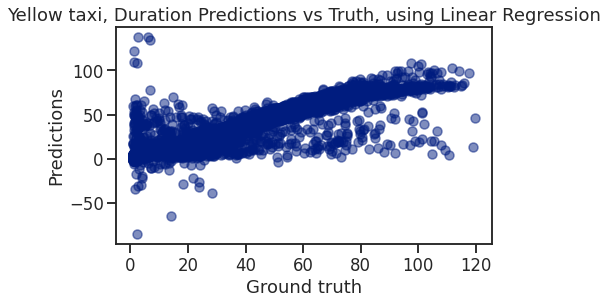

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Yellow taxi, Duration Predictions vs Truth, using Linear Regression')

In [40]:
lr_estimator.named_steps.model.coef_.shape

(1, 119)

In [41]:
df_importances = pd.DataFrame(zip(lr_estimator.named_steps.preparation.named_transformers_.poly.get_feature_names(input_features=X.columns),
                 lr_estimator.named_steps.model.coef_[0],
))
df_importances.shape

(105, 2)

In [42]:
df_importances[df_importances.apply(lambda x: abs(x[1]) > 50, axis=1)].sort_values(by=1).reset_index(drop=True)

,0,1
0,dropoff_latitude tolls_amount,-3.453688e+08
1,dropoff_latitude tip_amount,-3.453688e+08
2,dropoff_latitude fare_amount,-3.453688e+08
3,dropoff_latitude extra,-3.453688e+08
4,dropoff_longitude extra,-1.755724e+08
...,...,...
72,extra time_of_day,5.795479e+07
73,pickup_longitude total_amount,1.094154e+08
74,pickup_latitude total_amount,1.754241e+08
75,dropoff_longitude total_amount,1.755724e+08


In [43]:
df_importances = pd.DataFrame(zip(lr_estimator.named_steps.preparation.named_transformers_.poly.get_feature_names(input_features=X.columns),
                 lr_estimator.named_steps.model.coef_[0],
))
df_importances = df_importances[df_importances.apply(lambda x: abs(x[1]) > 50, axis=1)].sort_values(by=1).reset_index(drop=True).sort_values(by=1).rename(columns={0:'feature', 1:'value'})
df_importances

,feature,value
0,dropoff_latitude tolls_amount,-3.453688e+08
1,dropoff_latitude tip_amount,-3.453688e+08
2,dropoff_latitude fare_amount,-3.453688e+08
3,dropoff_latitude extra,-3.453688e+08
4,dropoff_longitude extra,-1.755724e+08
...,...,...
72,extra time_of_day,5.795479e+07
73,pickup_longitude total_amount,1.094154e+08
74,pickup_latitude total_amount,1.754241e+08
75,dropoff_longitude total_amount,1.755724e+08


In [44]:
width=750
height=None
orientation='h'
display_imp_value_decimals=1
yaxes_tickfont_family='Courier New'
yaxes_tickfont_size=15
text = df_importances.value.round(1)
title_text = f'Top {len(df_importances)} (out of 105) Feature Importances'
fig = px.bar(df_importances, 
            x='value', 
            y='feature',
            orientation=orientation, 
            width=width, 
            height=height,
             text=text)
fig.update_layout(title_text=title_text, title_x=0.5) 
fig.update(layout_showlegend=False)
fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                size=yaxes_tickfont_size),
                    title='')
fig.show()

## Fine-tune Model Using Cross Validation

In [45]:
from sklearn.model_selection import KFold, cross_val_predict

In [46]:
kf = KFold(shuffle=True, random_state=42, n_splits=10)

In [47]:
estimator = Pipeline([('preparation', transformer1), 
                     ('model', LinearRegression(n_jobs=-1))
                     ])

In [48]:
predictions = cross_val_predict(estimator, X_train, y_train, cv=kf)

In [49]:
r2_score(y_train, predictions)

0.9073212065497832

## Grid Search for Ridge Regressor

In [50]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
estimator = Pipeline([('preparation', transformer1), 
                      ("ridge_regression", Ridge())
                      ])

params = {
    'ridge_regression__alpha': alphas,
}

grid = GridSearchCV(estimator, params, cv=kf)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         Index(['day_of_week'], dtype='object'))])),
                                       ('ridge_regression', Ridge())]),
             param_grid={'ridge_regression__alpha': [0.005, 0.05, 0.1, 0.3, 1,
                                                     3, 5, 10, 15, 30, 80]})

In [51]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'ridge_regression', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__num', 'preparation__cat', 'preparation__num__copy', 'preparation__num__with_mean', 'preparation__num__with_std', 'preparation__cat__categories', 'preparation__cat__dtype', 'preparation__cat__handle_unknown', 'preparation__cat__unknown_value', 'ridge_regression__alpha', 'ridge_regression__copy_X', 'ridge_regression__fit_intercept', 'ridge_regression__max_iter', 'ridge_regression__normalize', 'ridge_regression__random_state', 'ridge_regression__solver', 'ridge_regression__tol'])

In [52]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         Index(['day_of_week'], dtype='object'))])),
                                       ('ridge_regression', Ridge())]),
             param_grid={'ridge_regression__alpha': [0.005, 0.05, 0.1, 0.3, 1,
                                                     3, 5, 10, 15, 30, 80]})

In [53]:
grid.best_score_, grid.best_params_

(0.9073257453822595, {'ridge_regression__alpha': 30})

In [54]:
y_predict = grid.predict(X_train)

In [55]:
r2_score(y_train, y_predict)

0.9073326469253757

In [56]:
best_estimator = grid.best_estimator_
best_estimator

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('ridge_regression', Ridge(alpha=30))])

In [57]:
# predict
y_train_pred = best_estimator.predict(X_train)
y_val_pred = best_estimator.predict(X_val)
y_test_pred = best_estimator.predict(X_test)

errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='Ridge_score_without_poly'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='Ridge_rmse_without_poly'))

In [58]:
pd.concat(errors, axis=1)

,score_without_poly,rmse_without_poly,score_without_poly,rmse_without_poly,Ridge_score_without_poly,Ridge_rmse_without_poly
train,0.897868,3.275742,0.974855,1.685357,0.897864,3.275742
val,0.898042,3.263581,0.975426,1.663812,0.898038,3.263582
test,0.897641,3.277864,0.972906,1.750163,0.897637,3.277869


In [59]:
best_estimator.named_steps['preparation'].get_params().keys()

dict_keys(['n_jobs', 'remainder', 'sparse_threshold', 'transformer_weights', 'transformers', 'verbose', 'num', 'cat', 'num__copy', 'num__with_mean', 'num__with_std', 'cat__categories', 'cat__dtype', 'cat__handle_unknown', 'cat__unknown_value'])

In [60]:
best_estimator.named_steps['preparation']

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['day_of_week'], dtype='object'))])

In [61]:
best_estimator.named_steps["ridge_regression"].coef_

array([[-7.08450275e-01, -3.32966992e-01,  2.54980811e-01,
        -3.14907251e-01,  1.89891777e-01,  7.94886518e+00,
         6.15010022e+00, -1.12503248e+00, -1.25105588e+00,
         1.39364886e-02,  0.00000000e+00, -1.24333880e-01,
        -3.85211502e+00,  3.05955367e-03]])

In [62]:
df_importances = pd.DataFrame(zip(np.array(X.columns.to_list()),
                 best_estimator.named_steps["ridge_regression"].coef_[0],
))
df_importances = df_importances.sort_values(by=1).rename(columns={0:'feature', 1:'value'})
df_importances

,feature,value
12,day_of_week,-3.852115
8,tolls_amount,-1.251056
7,tip_amount,-1.125032
0,trip_distance,-0.708450
1,pickup_longitude,-0.332967
3,dropoff_longitude,-0.314907
11,time_of_day,-0.124334
10,mta_tax,0.000000
13,ave_speed,0.003060
9,extra,0.013936


In [63]:
width=750
height=None
orientation='h'
display_imp_value_decimals=1
yaxes_tickfont_family='Courier New'
yaxes_tickfont_size=15
text = df_importances.value.round(2)
title_text = f'Top {len(df_importances)} Feature Importances'
fig = px.bar(df_importances, 
            x='value', 
            y='feature',
            orientation=orientation, 
            width=width, 
            height=height,
             text=text)
fig.update_layout(title_text=title_text, title_x=0.5) 
fig.update(layout_showlegend=False)
fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                size=yaxes_tickfont_size),
                    title='')
fig.show()

## Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
tree = DecisionTreeRegressor(max_depth=10)

In [66]:
estimator = Pipeline([('preparation', transformer1), 
                     ('model', tree)
                     ])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'total_amount',
       'tip_amount', 'tolls_amount', 'extra', 'mta_tax', 'time_of_day',
       'ave_speed'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['day_of_week'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=10))])

In [67]:
# predict
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)
y_test_pred = estimator.predict(X_test)

In [68]:
r2_score(y_train_pred, y_train)

0.9926368521686835

In [69]:
r2_score(y_val_pred, y_val)

0.9905872506558232

In [70]:
r2_score(y_test_pred, y_test)

0.9907309612702905

In [71]:
errors.append(pd.Series({'train': r2_score(y_train_pred, y_train),
           'val': r2_score(y_val_pred, y_val),
           'test' : r2_score(y_test_pred, y_test)},
          name='Decision Tree Score'))

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred, squared=False),
           'val': mean_squared_error(y_val_pred, y_val, squared=False),
           'test' : mean_squared_error(y_test,  y_test_pred, squared=False)},
          name='Decision Tree rmse'))

In [72]:
pd.concat(errors, axis=1)

,score_without_poly,rmse_without_poly,score_without_poly,rmse_without_poly,Ridge_score_without_poly,Ridge_rmse_without_poly,Decision Tree Score,Decision Tree rmse
train,0.897868,3.275742,0.974855,1.685357,0.897864,3.275742,0.992637,0.919994
val,0.898042,3.263581,0.975426,1.663812,0.898038,3.263582,0.990587,1.037704
test,0.897641,3.277864,0.972906,1.750163,0.897637,3.277869,0.990731,1.030708


[Text(0, 0.5, 'Predictions'),
 Text(0.5, 0, 'Ground truth'),
 Text(0.5, 1.0, 'Yellow taxi, Duration Predictions vs Truth, using Linear Regression')]

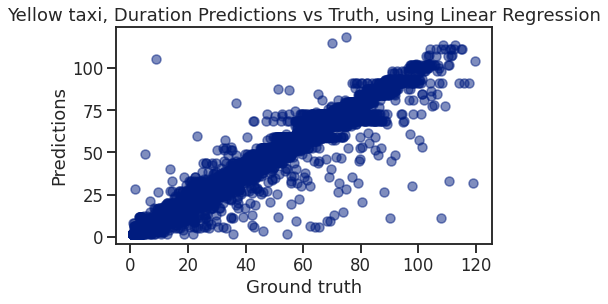

In [73]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Yellow taxi, Duration Predictions vs Truth, using Linear Regression')

In [74]:
df_importances = pd.DataFrame(zip(np.array(X.columns.to_list()),
                 estimator.named_steps.model.feature_importances_,
))
df_importances = df_importances.sort_values(by=1).rename(columns={0:'feature', 1:'value'})
df_importances

,feature,value
10,mta_tax,0.000000
7,tip_amount,0.000002
6,total_amount,0.000005
9,extra,0.000006
2,pickup_latitude,0.000007
11,time_of_day,0.000016
3,dropoff_longitude,0.000022
13,ave_speed,0.000031
4,dropoff_latitude,0.000051
8,tolls_amount,0.000063


In [75]:
width=750
height=None
orientation='h'
display_imp_value_decimals=1
yaxes_tickfont_family='Courier New'
yaxes_tickfont_size=15
text = df_importances.value.round(3)
title_text = f'Top {len(df_importances)} Feature Importances'
fig = px.bar(df_importances, 
            x='value', 
            y='feature',
            orientation=orientation, 
            width=width, 
            height=height,
             text=text)
fig.update_layout(title_text=title_text, title_x=0.5) 
fig.update(layout_showlegend=False)
fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                size=yaxes_tickfont_size),
                    title='')
fig.show()